## CIS 4526 Sp24 EDA Review Exercise

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

In [2]:
%pip install pandasql

Note: you may need to restart the kernel to use updated packages.


**Import all standard libaries**

In [3]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [4]:
crash = pd.read_csv("./car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [6]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.817308,5.060235,5.574385,13.648154,14.043558,887.323654,134.865577
std,4.086070,2.033018,5.245624,4.497172,3.737999,176.559356,24.737451
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.775000,3.766500,3.897000,10.611000,11.434000,768.690000,114.732500
50%,15.650000,4.806000,4.629000,13.908000,14.141500,860.075000,136.590000
75%,18.450000,6.531000,5.640500,16.334500,16.719500,1006.347500,152.335000
max,23.900000,9.450000,40.642000,23.661000,21.280000,1301.520000,194.780000


## Question 1. Check if there are any null or NA

**Type in your code here**

In [7]:
crash.isnull().sum()

accidents         0
speeding          1
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64

## Question 2. Remove any rows that has null or NA

In [8]:
crash.dropna(inplace=True)

In [9]:
crash.isnull().sum()

accidents         0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64

**Type in your code here**

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

array([[<AxesSubplot:xlabel='accidents', ylabel='accidents'>,
        <AxesSubplot:xlabel='speeding', ylabel='accidents'>,
        <AxesSubplot:xlabel='alcohol', ylabel='accidents'>,
        <AxesSubplot:xlabel='not_distracted', ylabel='accidents'>,
        <AxesSubplot:xlabel='no_previous', ylabel='accidents'>,
        <AxesSubplot:xlabel='ins_premium', ylabel='accidents'>,
        <AxesSubplot:xlabel='ins_losses', ylabel='accidents'>],
       [<AxesSubplot:xlabel='accidents', ylabel='speeding'>,
        <AxesSubplot:xlabel='speeding', ylabel='speeding'>,
        <AxesSubplot:xlabel='alcohol', ylabel='speeding'>,
        <AxesSubplot:xlabel='not_distracted', ylabel='speeding'>,
        <AxesSubplot:xlabel='no_previous', ylabel='speeding'>,
        <AxesSubplot:xlabel='ins_premium', ylabel='speeding'>,
        <AxesSubplot:xlabel='ins_losses', ylabel='speeding'>],
       [<AxesSubplot:xlabel='accidents', ylabel='alcohol'>,
        <AxesSubplot:xlabel='speeding', ylabel='alcohol'>,
    

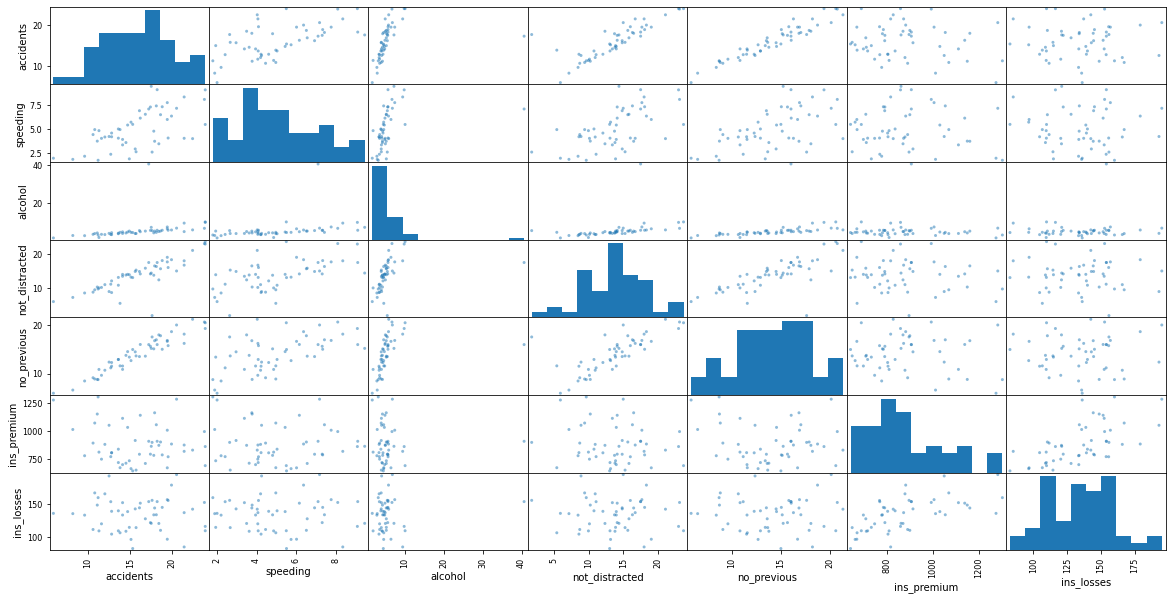

In [10]:
pd.plotting.scatter_matrix(crash,figsize=(20,10))

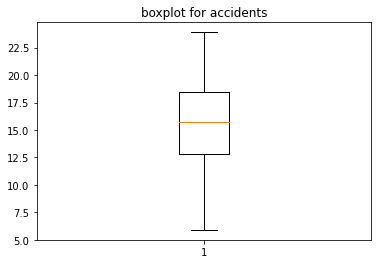

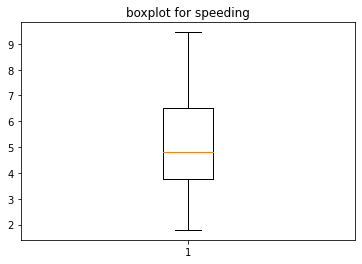

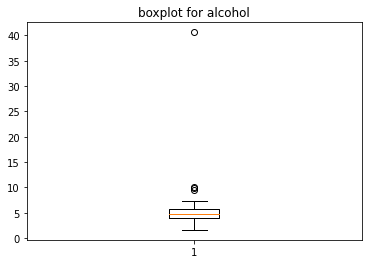

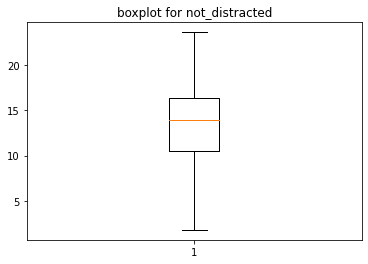

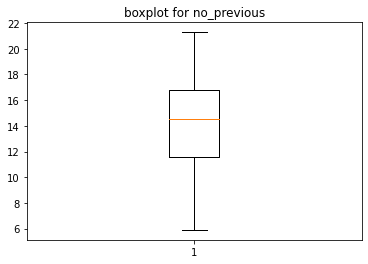

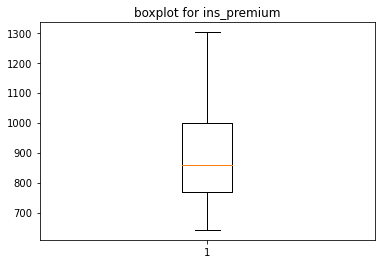

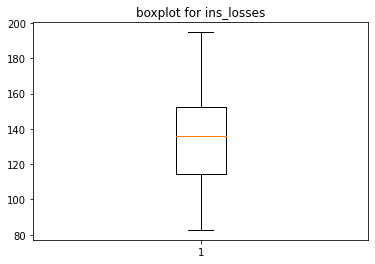

In [11]:
iteration=0
for cur in crash.columns:
    if iteration==7:
        break
    plt.boxplot(crash[cur])
    plt.title(f'boxplot for {cur}')
    plt.show()
    iteration+=1
    #if value is greater than q3 + 1.5(IQR)
    #or less than 1.5(IQR)-q1, then it's a potential outlier

## Question 4. Display and Remove (the real) outliers

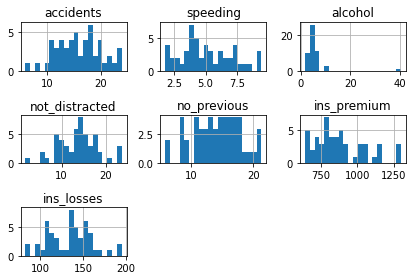

In [12]:
crash.hist(bins=20)
plt.tight_layout()
#alcohol is an outlier here, we must remove this outlier

In [13]:
crash= crash[crash['alcohol']<9 ]
#removing outliers

<AxesSubplot:>

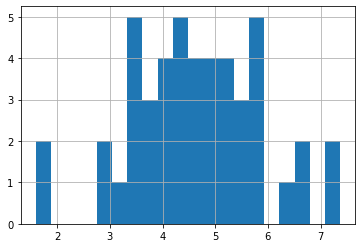

In [14]:
#now we compare the histogram of alcohol to see the outliers are gone
crash['alcohol'].hist(bins=20)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [15]:
from pandasql import sqldf
#sqldf allows us to use sql commands with pandas
query= '''select region, count(*), avg(speeding) from crash group by region HAVING region='Northeast' '''
result = sqldf(query, globals())
print(result)

      region  count(*)  avg(speeding)
0  Northeast         8        4.42475


**Type in your code here**

## Question 6. Calculate the average alcohol for each region using SQL

In [16]:
query= '''SELECT region, avg(alcohol) FROM crash group by region'''
result=sqldf(query, globals())
print(result)

      region  avg(alcohol)
0    Midwest      4.538636
1  Northeast      3.980500
2      South      5.140625
3       West      4.365583


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [17]:
query= '''SELECT division, count(*) AS occurences, avg(speeding) AS mean, min(speeding) AS min, max(speeding) FROM crash group by division'''
result= sqldf(query)
print(result)

             division  occurences      mean    min  max(speeding)
0  East North Central           5  4.106600  3.384          4.968
1  East South Central           4  4.533250  2.640          7.332
2     Middle Atlantic           2  5.446000  1.792          9.100
3            Mountain           7  5.450286  3.496          7.308
4         New England           6  4.084333  1.886          5.738
5             Pacific           5  5.949400  4.200          9.450
6      South Atlantic           8  4.524000  2.006          8.092
7  West North Central           6  4.092833  1.937          6.923
8  West South Central           4  6.333750  4.032          7.760


## Question 8. Answer Question 7 but use Pandas functions

In [18]:
occurences= crash['speeding'].count()
mean= crash['speeding'].mean()
minimum= crash['speeding'].min()
maximum= crash['speeding'].max()

print(f'''number occurences: {occurences}
        mean: {mean}
     minimum: {minimum}
     maximum: {maximum}''')

number occurences: 47
        mean: 4.852063829787234
     minimum: 1.792
     maximum: 9.45


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region. Based on the results, describe any insights that you may have on the dataset ?

In [19]:
regions= set(crash['region'])
info=['accidents', 'speeding', 'alcohol']
for current in regions:
    sub_df=crash[crash['region']==current]
    print(f'{current} region')
    for component in info:
        std= sub_df[component].std()
        skew= sub_df[component].skew()
        kurtosis= sub_df[component].kurtosis()
        print(f'''component {component} for {current} has 
        std: {std},
        skew: {skew},
        kurtosis: {kurtosis}
        
        
        ''')

South region
component accidents for South has 
        std: 4.408169499160999,
        skew: -1.21866260404068,
        kurtosis: 2.1252313339070703
        
        
        
component speeding for South has 
        std: 2.050343694765994,
        skew: 0.1315977867711356,
        kurtosis: -1.499308060693556
        
        
        
component alcohol for South has 
        std: 1.411977236596492,
        skew: -0.9011812708567198,
        kurtosis: 1.5228103826068873
        
        
        
Northeast region
component accidents for Northeast has 
        std: 3.077452564332111,
        skew: 0.7775866065677681,
        kurtosis: 0.7267132014961879
        
        
        
component speeding for Northeast has 
        std: 2.32777341496731,
        skew: 1.0516662769374285,
        kurtosis: 1.7635198941056522
        
        
        
component alcohol for Northeast has 
        std: 0.8729495158042402,
        skew: 0.7642499279354064,
        kurtosis: 0.8905007105282792
 

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

now looking at South regions accidents
now looking at Northeast regions accidents
now looking at West regions accidents
now looking at Midwest regions accidents


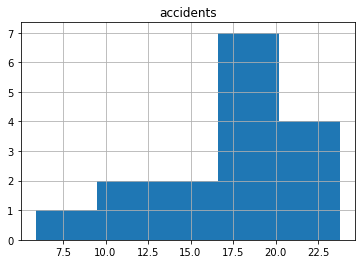

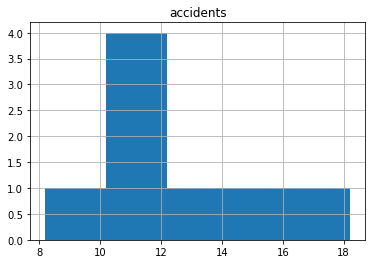

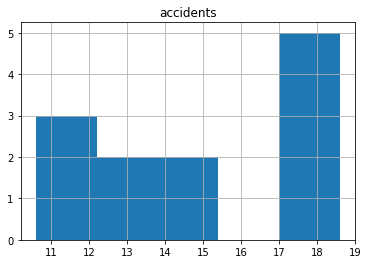

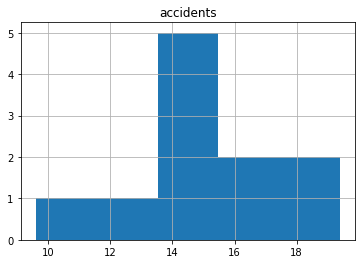

In [20]:
columns=set(crash['region'].to_list())
for current in columns:
    print(f'now looking at {current} regions accidents')
    sub_df= crash[crash['region']==current]
    sub_df.hist(column= ['accidents'], bins=5)

**Type in your answer here**

### Now Load a different dataset (MPG dataset number 3)

In [26]:
mpg = pd.read_csv("./mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 11: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [27]:
mpg.isna().sum()

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [28]:
mpg['mpg'].fillna(value=mpg['mpg'].mean(), inplace=True)
mpg['horsepower'].fillna(value=mpg['horsepower'].mean(), inplace=True)
mpg['weight'].fillna(value=mpg['weight'].mean(), inplace=True)

In [29]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64